## Youtube Comments

For recent months, politics section become the most trending topics in social media and even real life. So many people would spend their time with others to discuss and talks about politics that happened in Indonesia. There are two candidates in Indonesia. There are Prabowo Subianto and Sandiaga Uno for candidate number 1, and there are Joko Widodo and Ma'aruf Amin for candidate number 2. Mata Najwa known as the best media for debating between that two different candidates. For more than three months, Mata Najwa brought their topics that related to these two candidates. Due to the audience (netizen) who become the participants to help the video in Youtube trending, we want to analyst about it more.

Topic of the video : Usai Laga Pilpress - Mata Najwa
(Whole section of 'Usai Laga Pilpres' seperated into 7 different parts in youtube)

<img src="matanajwa.png">

Part 1 - https://youtu.be/ltoDtNSyoLM
Part 2 - https://youtu.be/-vpUvEPZQHI
Part 3 - https://youtu.be/YvMAhjFo48c
Part 4 - https://youtu.be/pqJ5XPALvFM
Part 5 - https://youtu.be/vUnzCSfDJgQ
Part 6 - https://youtu.be/r0u4oGIwOOA
Part 7 - https://youtu.be/9ON1ZJV4K_s


### SCRAPPING YOUTUBE COMMENTS

first thing to do, we need to fill all the comments that people entered in those 7 parts video. so we use third-party app from another website. http://ytcomments.klostermann.ca/ allows us to download (scrape) all comments from a given YouTube video. We only need to fill youtube link and we immediately get the results include the comment text, username, date and other information.

The comments can be downloaded as one of the following:
- JSON
- CSV (can be opened in Excel)

In [1]:
#BEGIN WITH IMPORTING LIBRARY CAPCUZZ

import re #for regex
import time
import matplotlib #make necessary statistical inferences to visualize the data 
import numpy as np #linear algebra for data manipulation (changed into np for shorter word)
import matplotlib.pyplot as plt #for generating some plots module
import pandas as pd #Pandas stands for “Python Data Analysis Library”
import seaborn as sns #making statistical graphics in Python.

In [2]:
#IMPORT SOURCE (YOUTUBE COMMENTS)
data = pd.read_csv('commentsv2.csv')

#print(df.columns) #checking columns
#columns: 'commentText', 'id', 'numberOfReplies', 'user', 'date', 'timestamp', 'likes' dtype='object'

#renaming columns
data = data.rename(columns={"numberOfReplies": "replies"})
data = data.rename(columns={"commentText": "comment"})

#output
data.head()

,comment,id,replies,user,date,timestamp,likes
0,string,string,discrete,string,discrete,continuous,discrete
1,meta,meta,meta,meta,meta,meta,meta
2,Terima kasih sudah menonton episode Mata Najwa...,UgyAvP8T3YnPRlXsfZd4AaABAg,134.0,Najwa Shihab,1 month ago,1557714685314.0,2080.0
3,Wah mlah do gluweh Iki..,UgzIhIktdjL2KQIvg4l4AaABAg,0.0,Gio 99,31 minutes ago,1560391225316.0,0.0
4,Pelawak gendut itu lucu,Ugyo50Ua-ES2p4q9GHR4AaABAg,0.0,Sariyana BANDI,5 hours ago,1560375085323.0,0.0


In [3]:
#as seen above, the first two rows only describes as the types
#so, we need to erase these two columns
data = data.drop([0,1], axis=0)
data.head()

,comment,id,replies,user,date,timestamp,likes
2,Terima kasih sudah menonton episode Mata Najwa...,UgyAvP8T3YnPRlXsfZd4AaABAg,134.0,Najwa Shihab,1 month ago,1557714685314.0,2080.0
3,Wah mlah do gluweh Iki..,UgzIhIktdjL2KQIvg4l4AaABAg,0.0,Gio 99,31 minutes ago,1560391225316.0,0.0
4,Pelawak gendut itu lucu,Ugyo50Ua-ES2p4q9GHR4AaABAg,0.0,Sariyana BANDI,5 hours ago,1560375085323.0,0.0
5,"Puyono jadi pelawak aja,",Ugy7lK_-e7aD7f8Y2zZ4AaABAg,0.0,Muslim lim lim limmm,7 hours ago,1560367885325.0,0.0
6,Memang bang adian ini kalau ngomong suka jujur...,UgwWC5L8UpFgbi4uBOR4AaABAg,0.0,N O Siagian,8 hours ago,1560364285327.0,0.0


In [4]:
#whole data scanned as an object. so i need to change it into float and string
data['likes'] = data.likes.astype('float')
data['replies'] = data.replies.astype('float')
data['comment'] = data.comment.astype('str')

data.dtypes

comment       object
id            object
replies      float64
user          object
date          object
timestamp     object
likes        float64
dtype: object

In [5]:
dataset = data.shape
print("So, we have", dataset[0] , "comments listed and there are ", dataset[1], "elements in each row")

So, we have 45836 comments listed and there are  7 elements in each row


In [6]:
#ABOUT LIKES

[data['likes'].sum(), # Total sum of the column values
 data['likes'].mean(), # Mean of the column values
 data['likes'].median(), # Median of the column values
 data['likes'].nunique(), # Number of unique entries
 data['likes'].max(), # Maximum of the column values
 data['likes'].min()] # Minimum of the column values

[370051.0, 8.07337027663845, 0.0, 505, 3812.0, 0.0]

Text(0.5, 0, 'likes value')

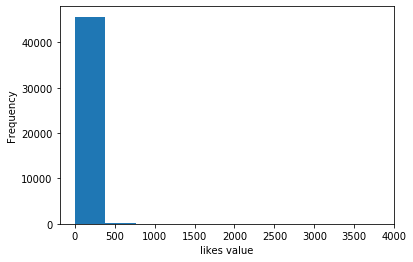

In [7]:
data['likes'].plot(kind='hist', bins=10)
plt.xlabel('likes value')

In [8]:
#finding comment that has most likes
data[data["likes"] == 3812]

,comment,id,replies,user,date,timestamp,likes
25263,Yang setuju Eggy Durjana Dan habeb rizki dipol...,Ugy_TwRR8adVBRP3FVF4AaABAg,108.0,Pakpak Ethnic Cannibal,1 month ago,1557717957252.0,3812.0


In [9]:
#ABOUT REPLIES

[data['replies'].sum(), # Total sum of the column values
 data['replies'].mean(), # Mean of the column values
 data['replies'].median(), # Median of the column values
 data['replies'].nunique(), # Number of unique entries
 data['replies'].max(), # Maximum of the column values
 data['replies'].min()] # Minimum of the column values

[20740.0, 0.45248276463914827, 0.0, 92, 257.0, 0.0]

Text(0.5, 0, 'replies value')

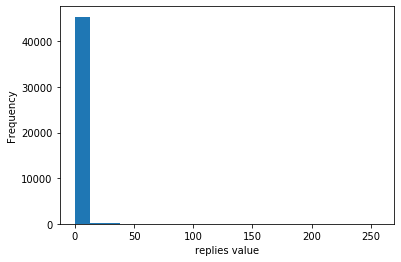

In [10]:
data['replies'].plot(kind='hist', bins=20)
plt.xlabel('replies value')

In [11]:
#finding the comment that got most replies
data[data["replies"] == 257.0]

,comment,id,replies,user,date,timestamp,likes
25224,KALO TERJADI RUSUH TANGKAP :\n1. EGI DURJANA\n...,UgwxEy2JQAe4yIG8Wvh4AaABAg,257.0,Muhammad Sidik,1 month ago,1557717940213.0,1657.0


# # TOKENIZATION



In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module itself and can be used in programs as shown below.

### NLTK (Natural Language Toolkit)
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

<img src="nltk.png">

<img src="nltkdownload.png">

In [12]:
#karena sebelumnya comments bersifat columns, maka dari itu dijoin jadi satu string panjang yang sama
komentar = ' '.join(data['comment'].tolist())

In [22]:
import nltk
import string
import io
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#lowering alphabet. no capitalize. supaya gak beda value setiap kata
komentar = komentar.translate(str.maketrans('','',string.punctuation)).lower()

#start to tokenizing by whitespace
tokens = nltk.tokenize.word_tokenize(komentar)

#komentar.dropna(inplace=True)
#tokens = komentar.apply(word_tokenize)

In [23]:
#output output HAHAHAH BISA YEAY. error tpi kebaca intinya :")
print(tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
from nltk.probability import FreqDist

#memberikan value ke tiap masing-masing kata
katakata = nltk.FreqDist(tokens)

#setiap kata yang sama, valuenya akan ditambah
print(katakata.most_common())

[('yg', 11604), ('di', 8493), ('dan', 6313), ('ini', 5831), ('yang', 5595), ('itu', 5259), ('prabowo', 4715), ('ada', 4709), ('menang', 4381), ('02', 4164), ('aja', 3770), ('ulama', 3721), ('ya', 3633), ('adian', 3579), ('pak', 3567), ('rakyat', 3522), ('mau', 3432), ('saya', 3405), ('kalah', 3392), ('jokowi', 3313), ('orang', 3179), ('jadi', 3101), ('nya', 3075), ('indonesia', 3047), ('presiden', 3011), ('gak', 2836), ('bang', 2808), ('kok', 2730), ('curang', 2711), ('tidak', 2631), ('apa', 2630), ('‘', 2366), ('sama', 2336), ('ga', 2259), ('kalo', 2200), ('dari', 2199), ('kalau', 2194), ('arif', 2190), ('bisa', 2134), ('kita', 2098), ('mereka', 1909), ('bukan', 1852), ('kubu', 1840), ('kpu', 1804), ('tapi', 1794), ('untuk', 1778), ('sudah', 1746), ('jangan', 1730), ('si', 1680), ('negara', 1599), ('gk', 1583), ('udah', 1582), ('akan', 1570), ('people', 1566), ('power', 1564), ('ke', 1554), ('semua', 1526), ('mana', 1470), ('politik', 1450), ('lagi', 1449), ('klo', 1438), ('dia', 1411

In [25]:
print("dari data yang diambil,") 
print("kata JOKOWI digunakan sebanyak", katakata["jokowi"], "kata PRABOWO digunakan sebanyak", katakata["prabowo"])

dari data yang diambil,
kata JOKOWI digunakan sebanyak 3313 kata PRABOWO digunakan sebanyak 4715


In [73]:
print(katakata["bacot"])

214


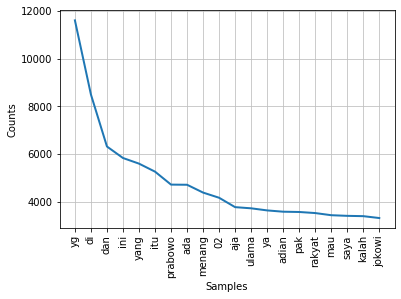

In [26]:
katakata.plot(20)

# FILTERING

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

### What are Stop words?
Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

kalo di bahasa indonesia itu ada: yang, apabila, yakni, yaitu

In [61]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("indonesian"))
print(stop_words)

{'dijelaskan', 'sedemikian', 'sela', 'kira-kira', 'demi', 'pertama-tama', 'baru', 'sebisanya', 'sini', 'mana', 'keterlaluan', 'tuturnya', 'tetap', 'berkeinginan', 'selama', 'tertuju', 'inginkan', 'menegaskan', 'saling', 'diperkirakan', 'pihak', 'terjadinya', 'diinginkan', 'tanyakan', 'disinilah', 'disini', 'enggaknya', 'dikira', 'makin', 'sekali', 'tempat', 'tertentu', 'sangat', 'semula', 'seolah', 'ataukah', 'berbagai', 'demikianlah', 'meyakini', 'berlangsung', 'sebanyak', 'sesudah', 'perlukah', 'terlebih', 'diperlihatkan', 'adapun', 'sampaikan', 'diketahui', 'itu', 'belum', 'mendapat', 'kenapa', 'sayalah', 'dimaksudkannya', 'berturut-turut', 'hingga', 'dijelaskannya', 'perlunya', 'seusai', 'hendak', 'kalaupun', 'pastilah', 'bolehlah', 'walau', 'inikah', 'besar', 'kelima', 'malahan', 'sesegera', 'lah', 'sekarang', 'sangatlah', 'ucap', 'keluar', 'oleh', 'siapa', 'benar', 'tanpa', 'maka', 'menurut', 'sejenak', 'bagaimanapun', 'apatah', 'kiranya', 'ibaratkan', 'tentu', 'inginkah', 'mengu

In [66]:
filtered_sent=[]
for w in tokens:
    if w not in stop_words:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokens)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
#memberikan value ke tiap masing-masing kata
katakata2 = nltk.FreqDist(filtered_sent)

#setiap kata yang sama, valuenya akan ditambah
print(katakata2.most_common())

[('yg', 11604), ('prabowo', 4715), ('menang', 4381), ('02', 4164), ('aja', 3770), ('ulama', 3721), ('ya', 3633), ('adian', 3579), ('rakyat', 3522), ('kalah', 3392), ('jokowi', 3313), ('orang', 3179), ('nya', 3075), ('indonesia', 3047), ('presiden', 3011), ('gak', 2836), ('bang', 2808), ('curang', 2711), ('‘', 2366), ('ga', 2259), ('kalo', 2200), ('arif', 2190), ('kubu', 1840), ('kpu', 1804), ('si', 1680), ('negara', 1599), ('gk', 1583), ('udah', 1582), ('people', 1566), ('power', 1564), ('politik', 1450), ('klo', 1438), ('01', 1320), ('bilang', 1304), ('najwa', 1290), ('arief', 1287), ('bikin', 1210), ('kecurangan', 1183), ('islam', 1167), ('tau', 1116), ('egi', 1115), ('ngomong', 1112), ('pemilu', 1068), ('jd', 1060), ('wowo', 1050), ('puyono', 1046), ('debat', 1027), ('banget', 1018), ('sih', 1012), ('pendukung', 1001), ('liat', 989), ('lucu', 943), ('d', 901), ('allah', 899), ('„', 894), ('salah', 882), ('2', 857), ('bengkulu', 857), ('nana', 856), ('org', 853), ('suka', 844), ('kam

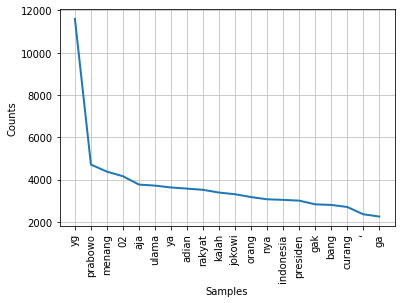

In [69]:
katakata2.plot(20)

In [78]:
if re.search(r"kalah", komentar):
    print("Match found")
else:
    print("Match not found")

Match found


# SENTIMENT ANALYSIS

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. However, analysis of social media streams is usually restricted to just basic sentiment analysis and count based metrics. This is akin to just scratching the surface and missing out on those high value insights that are waiting to be discovered. So what should a brand do to capture that low hanging fruit?

With the recent advances in deep learning, the ability of algorithms to analyse text has improved considerably. Creative use of advanced artificial intelligence techniques can be an effective tool for doing in-depth research. We believe it is important to classify incoming customer conversation about a brand based on following lines:
Key aspects of a brand’s product and service that customers care about.
Users’ underlying intentions and reactions concerning those aspects.

In [31]:
#sentiment analysis
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [50]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    
sentiment_analyzer_scores("The food is really GOOD!")

# print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
# print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
# print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 

The food is really GOOD!---------------- {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.6391}


In [70]:
#test to data

scores =[]
#sentences = ["A really bad, horrible book.", "A good, awesome, wonderful, cool book !!!  :)"]
sentences = data["comment"]

for sentence in sentences:
    score = analyser.polarity_scores(sentence)
    scores.append(score2)

In [71]:
dataFrame= pd.DataFrame(scores)

In [72]:
print(dataFrame)

       compound   neg    neu    pos
0        0.0000  0.00  1.000  0.000
1        0.0000  0.00  1.000  0.000
2        0.0000  0.00  1.000  0.000
3        0.0000  0.00  1.000  0.000
4        0.0000  0.00  1.000  0.000
5        0.0000  0.00  1.000  0.000
6        0.0000  0.00  1.000  0.000
7        0.0000  0.00  1.000  0.000
8        0.0000  0.00  1.000  0.000
9        0.0000  0.00  1.000  0.000
10       0.0000  0.00  1.000  0.000
11       0.0000  0.00  1.000  0.000
12       0.0000  0.00  1.000  0.000
13       0.3612  0.00  0.889  0.111
14       0.0000  0.00  1.000  0.000
15       0.0000  0.00  1.000  0.000
16       0.0000  0.00  1.000  0.000
17       0.0000  0.00  1.000  0.000
18       0.4588  0.00  0.870  0.130
19       0.0000  0.00  1.000  0.000
20       0.0000  0.00  1.000  0.000
21       0.0000  0.00  1.000  0.000
22       0.0000  0.00  1.000  0.000
23       0.0000  0.00  1.000  0.000
24       0.0000  0.00  1.000  0.000
25       0.0000  0.00  1.000  0.000
26       0.0000  0.00  1.000

In [29]:
from collections import Counter

def readwords(komentar):
    f = komentar
    # words = [ line.rstrip() for line in f.readlines()]
    return words

positive = readwords('positive.txt')
negative = readwords('negative.txt')

paragraph = komentar
count = Counter(paragraph)

pos = 0
neg = 0
for key, val in dict.iteritems():
    key = key.rstrip('.,?!\n') # removing possible punctuation signs
    if key in positive:
        pos += val
    if key in negative:
        neg += val

print(pos, neg)

AttributeError: type object 'dict' has no attribute 'iteritems'

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:
#cleaning the data
def remove_stopwords(param):
    with open('stopwords.txt','r') as my_stopwords:
        stopwords_list = my_stopwords.read()
        new_list = []
        if str(param) not in stopwords_list:
            new_list.append(param)
        else:
            pass
        my_stopwords.close()
    print(new_list)

# PyDash

pydash is a lightweight web-based monitoring tool for Linux written in Python and Django plus Chart.js. It has been tested and can run on the following mainstream Linux distributions: CentOS, Fedora, Ubuntu, Debian, Arch Linux, Raspbian as well as Pidora.

In [ ]:
#scratching

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div(children[html.H1('like counts'),
                              dcc.Graph(id='example',
                                       figure={
                                           'data':[
                                               {'x': [1,2,3], 'y':[5,6,7], 'type':'line', 'name':'boats'},
                                               {'x': [1,2,3], 'y':[8,2,3], 'type':'bar', 'name':'cars'},
                                           ],
                                           'layout': {
                                               'title':'Jokowi vs Prabowo'
                                           }
                                       })
                              ])

if __name__ == '__main__':
    app.run_server(debug=True)

# TIMESTAMP

<img src="dayofweek.png">